# Linear Models

Code for the Linear Models

## In-Class Demos

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05002 0.27558 0.49485 0.50036 0.72985 0.94994 

[1] 0.5067304

[1] 0.3260917

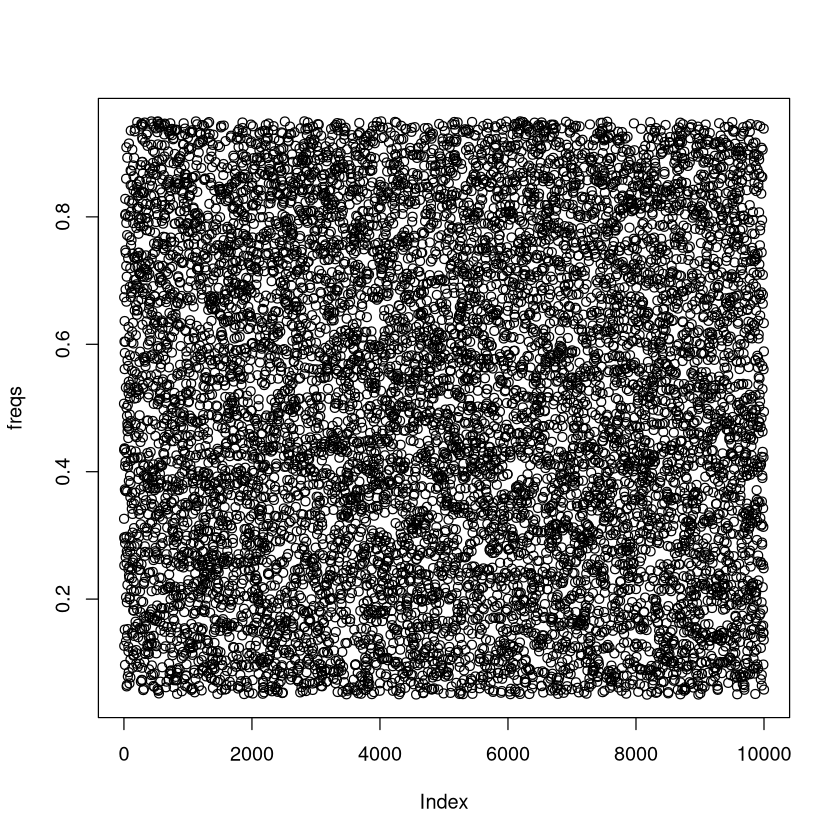

In [1]:
#Quantitative genetics example of linear models 
N = 1000 #number of individuals
M = 10000 #number of SNPs
set.seed(10)

#Simulate SNP allele frequencies uniformly. create array of freqs with random value between .05 and .95
freqs = runif(M,0.05,0.95)
summary(freqs)
plot(freqs) #verify that it is uniformly distributed
freqs[1] #freq for snp 1
freqs[2] #freq for snp 2

#Simulate genotypes of each individual using allele frequencies. create matrix of each snp for each individual and assign random snp value for each loci based on established freq
genos = matrix(0,nrow=N,ncol=M);
for(i in 1:N) {
    genos[i,]=rbinom(M,2,freqs) 
}

#Simulate phenotypes of each individual using first SNP only
beta = 2
pheno = genos[,1]*beta + rnorm(N) #rnorm used to simulate variance. generate phenotype data based on snp1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.5934  0.8698  2.0944  2.0763  3.3816  6.2827 

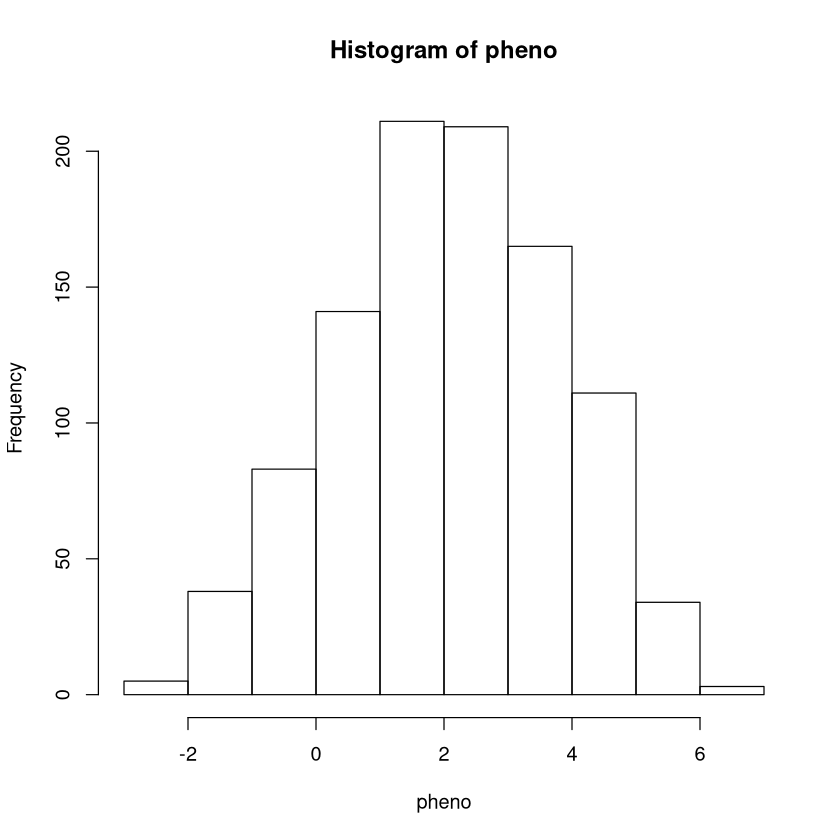

In [4]:
summary(pheno)
hist(pheno)

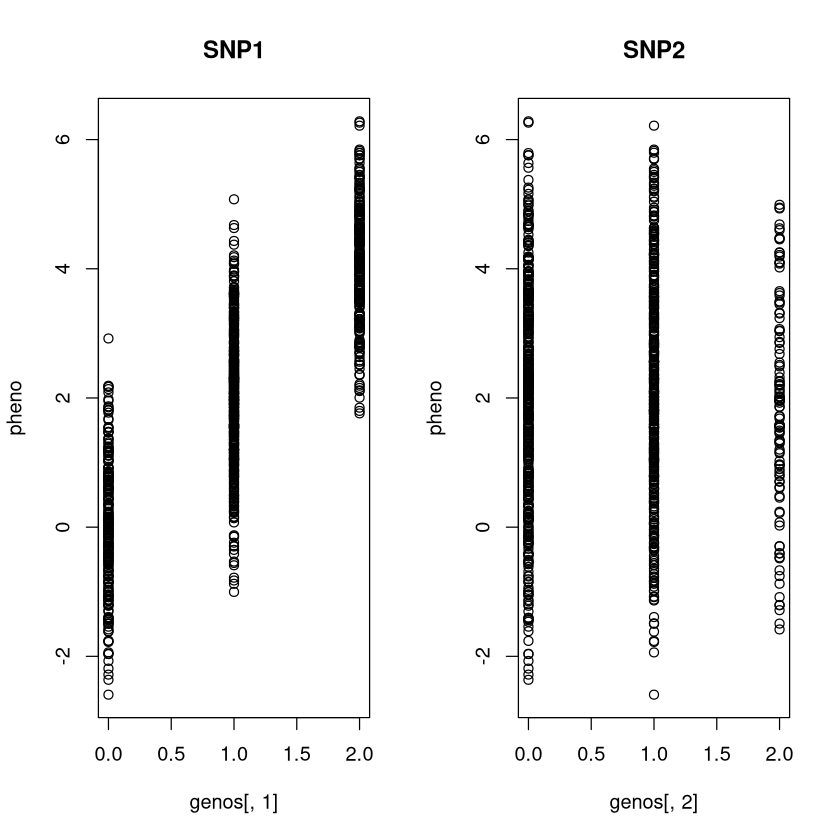

In [5]:
#Visualize relationship
par(mfrow=c(1,2))
plot(genos[,1],pheno,main="SNP1")
plot(genos[,2],pheno,main="SNP2")


This makes sense bc we expect some relationship between snp1 and pheno bc we made pheno from snp1. however snp2 has no relation to pheno so there appears to be no relationship

In [6]:

#Fit linear models
#SNP1
mod1 = lm(pheno~genos[,1]) #lm(output~dependent)
summary(mod1)
zscore1 = cor(genos[,1],pheno)*sqrt(N)
zscore1
ATT1 = cor(genos[,1],pheno)^2*N
ATT1
#SNP2
mod2 = lm(pheno~genos[,2])
summary(mod2)
zscore2 = cor(genos[,2],pheno)*sqrt(N)
zscore2
ATT2 = cor(genos[,2],pheno)^2*N
ATT2

#Power is a function of beta, minor allele frequency, and sample size
#Try varying these parameters in the simulation and see what happens


Call:
lm(formula = pheno ~ genos[, 1])

Residuals:
     Min       1Q   Median       3Q      Max 
-3.03900 -0.68154  0.02402  0.67186  3.03927 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03367    0.05694   0.591    0.554    
genos[, 1]   2.00259    0.04615  43.392   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.013 on 998 degrees of freedom
Multiple R-squared:  0.6536,	Adjusted R-squared:  0.6532 
F-statistic:  1883 on 1 and 998 DF,  p-value: < 2.2e-16


[1] 25.56507

[1] 653.5728


Call:
lm(formula = pheno ~ genos[, 2])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6692 -1.2076  0.0186  1.3046  4.2053 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.077363   0.076418   27.18   <2e-16 ***
genos[, 2]  -0.001588   0.081415   -0.02    0.984    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.721 on 998 degrees of freedom
Multiple R-squared:  3.811e-07,	Adjusted R-squared:  -0.001002 
F-statistic: 0.0003804 on 1 and 998 DF,  p-value: 0.9844


[1] -0.01952291

[1] 0.0003811442